## Measuring Magnetic Constant Experiment - Complete
### Load Libraries

In [11]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.special import factorial
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.stats import chi2

# For plotting
import matplotlib.pyplot as plt

## 1. Plot of $\frac{(I_+^2 + I_-^2)}{2}$ vs m
Equation that considers earth magnetic field is written as:
$$\frac{I_+^2 + I_-^2}{2} = (\frac{2 \pi dg}{\mu_0 l}) * m$$
where $(\frac{2 \pi dg}{\mu_0 l})$ is slope

d is 
$$ d = \frac{Dc}{2b} + barDiameter $$

Then $\mu_0$ will be
$$\mu_0 = \frac{2 \pi d g}{(slope)l} $$



slope= (887.9 ± 9.7)
intercept = (0.32 ± 0.41)
mu0_hat = 1.151E-06 H/m
alpha_mu0 = 4.1E-08 H/m


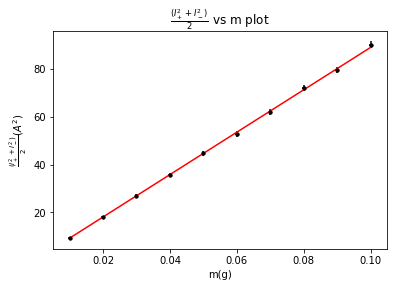

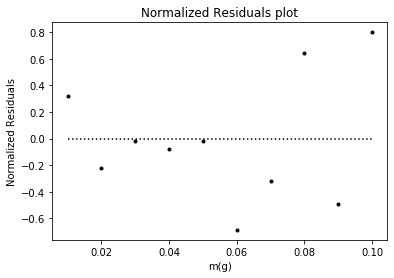

In [12]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "(I+^2 + I-^2)/2 (A^2)"
labelx = "m(g)"

#global constants
D = 2.3 # Difference in scale reading between equilibrium point and heavy mass point [cm]
b = 218.6 # distance from mirror to scale [cm]
l = 26.575 # top conductor lenth [cm]
c = 22.0125 # mirror to top conductor [cm]
g = 980.665 #graviattional constant [cm/s^2]
barDiam = 0.325 # bar diameter [cm]
d0 = D * c / (2 * b) # top & bottom conductor separation excluding bar diameter [cm]
d = d0 + barDiam #top & bottom conductor separation including bar diameter [cm]

alpha_D = np.sqrt(0.2**2 + 0.2**2)
#alpha_D = np.sqrt(0.5**2 + 0.5**2) # overestimate version of alpha_D
alpha_b = 1.0
alpha_l = 0.0502
alpha_c = 0.0502
alpha_barDiam = 0.005
alpha_d0 = d0 * np.sqrt( (alpha_D/D)**2 + (alpha_c/c)**2 + (alpha_b/b)**2)
alpha_d = np.sqrt( alpha_d0**2 + alpha_barDiam**2 )

I1, m = np.genfromtxt(f"data/2020-11-10-forward-data.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

I2, m = np.genfromtxt(f"data/2020-11-10-reversed-data.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

y = ( I1**2 + I2**2 ) / 2

#uncertainties
alpha_I1 = 0.002 * I1 + 0.05
alpha_I2 = 0.002 * I2 + 0.05
# alpha_Isq = Isq * np.sqrt(abs(2 * alpha_I / I))
alpha_y = np.sqrt( (alpha_I1 * (abs(2 * I1)))**2 + (alpha_I2 * (abs(2 * I2)))**2 )
alpha_m = 0.0005

#number of parameters
n = 2

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
x = m
y = y
alpha_x = alpha_m
alpha_y = alpha_y
N = len(x)

def myFunc(x, m, b):
    return m * x + b

pOpt, pCov = curve_fit(myFunc, x, y,
                       p0=[1, 0],
                       sigma=alpha_y,
                       absolute_sigma=True) # abs sigma set to true if y error is known with the samee unit

# Assign each element of pOpt to a named variable
p0_opt = pOpt[0]
p1_opt = pOpt[1]

# Compute the standard errors for the parameters
# by taking the square root of the diagonal elements of pCov
alpha_vec = np.sqrt(np.diag(pCov))

# Assign each element of alpha_vec to a named variable
alpha_p0 = alpha_vec[0]
alpha_p1 = alpha_vec[1]

# ------------------------------------------------------------------------------------
# printing result 
# ------------------------------------------------------------------------------------

# Show optimized fit parameters and uncertainties
slope = p0_opt
intercept = p1_opt

alpha_slope = alpha_p0
alpha_intercept = alpha_p1

print(f"slope= ({slope:.1f} ± {alpha_slope:.1f})")
print(f"intercept = ({intercept:.2f} ± {alpha_intercept:.2f})")

mu0_hat = 2 * np.pi * d * g / (slope * l) * 10 ** (-5)
alpha_m0 = mu0_hat * np.sqrt( (alpha_d/d)**2 + (alpha_slope/slope)**2 + (alpha_l/l)**2)
print(f"mu0_hat = {mu0_hat:.3E} H/m")
print(f"alpha_mu0 = {alpha_m0:.1E} H/m")
#print(f"mu0 = ({mu0_hat:.2f} ± {alpha_m0:.2f}) H/m")

# ---------------------------------------------------------------
# plotting
# ---------------------------------------------------------------

#Plot data
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt), 'r-')
plt.errorbar(x, y, xerr=alpha_x, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(r'$\frac{(I_+^2 + I_-^2)}{2} (A^2)$')
plt.title(r'$\frac{(I_+^2 + I_-^2)}{2}$ vs m plot')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Normalized Residuals')
plt.title(f'Normalized Residuals plot')
plt.show()


### Combining Plotting - Combining Plot and Normalized Residuals for Technical Summary
Reproducing the plot combining linear fitted plot and normalized residuals in a single figure. This figure is used in the **technical summary**.

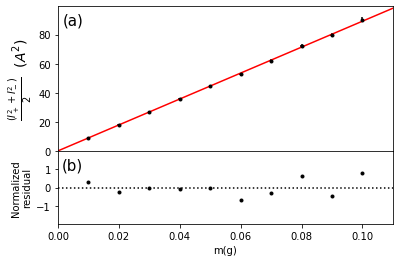

In [13]:
# plotting
# Make a grid with 2 rows, 1 colum, a 4:2 height ratio, and no 
# height space between the rows
gs = GridSpec(2, 1, height_ratios=[4, 2], hspace=0)

# Create figure
fig = plt.figure()
x_range = [0, np.max(x) * 1.1]

# Compute the measurement residuals
residuals = y - (slope*x + intercept)

# Compute the model curve
x_model = np.linspace(x_range[0], x_range[1])
y_model = slope*x_model + intercept

# Make the main plot
ax_main = fig.add_subplot(gs[0])

# Plot data as black dots
plt.errorbar(x, y, xerr=alpha_x, yerr=alpha_y, fmt='k.')

# Plot fit as a red line
plt.plot(x_model, y_model, 'r-')

# Format top panel: set axis ranges and add y-axis label
# No x-axis label here to avoid overlap with residual plot
plt.xlim(x_range[0], x_range[1])
plt.ylim(0, np.max(y) * 1.1)
plt.ylabel(r'$\frac{(I_+^2 + I_-^2)}{2}~~(A^2)$',fontsize=14)
#plt.title(r'$\frac{(I_+^2 + I_-^2)}{2}$ vs m plot')

# Hide x-tick labels to avoid overlap with residual plot
ax_main.set_xticklabels([])
ax_main.text(0.075, 0.85, '(a)',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax_main.transAxes,
        fontsize=15)

# Make the residual plot with a dotted zero line
# Need to adjust ylim,  yticks, ylabel for readability
ax_res = fig.add_subplot(gs[1])
ax_res.text(0.075, 0.7, '(b)',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax_res.transAxes,
        fontsize=15)

# Plot residuals as black dots
plt.plot(x, residuals/alpha_y,'k.')

# Show zero line as a black dotted line
plt.plot(x_range, [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format

# Format bottom panel: set axis ranges, explicitly set
# y-tick values to avoid overlap with top panel, and
# add labels to x-axis and y-axis
plt.xlim(x_range[0], x_range[1])
plt.ylim(-2, 2)
plt.yticks([-1, 0, 1])
plt.xlabel(f"{labelx}")
plt.ylabel("Normalized\nresidual")
plt.savefig("plot.pdf")

## 2. Chi-square Analysis

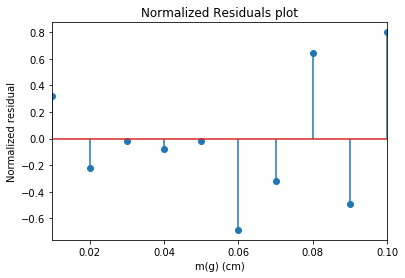

degree of freedom dof = 8
chisq_min = 2.0
Cumulative probability = 0.019811
Significance: 0.980189
chisq_min is within the range of [v-2*sqrt(2v), v+2*sqrt(2v)] = [0.0, 16.0], so our model is within the 2*sigma range


In [14]:
# --------------------------------------------------------------------------------------------------
# Chi-square analysis
# --------------------------------------------------------------------------------------------------
# Compute and display chi-squared minimum
dof = len(x) - n
res = y - myFunc(x, p0_opt, p1_opt)
normres = res/alpha_y
chisq = np.sum(normres**2)
reduced_chisq = chisq / dof
cdf = chi2.cdf(chisq, dof) # Compute the probability of getting this fit result

# plotting result
plt.stem(x, normres, use_line_collection=True)
plt.xlabel(f'{labelx} (cm)')
plt.ylabel('Normalized residual')
plt.title(f'Normalized Residuals plot')
plt.xlim(np.min(x), np.max(x))
plt.show()

# printing result -------------------------------------------------------------------------
print(f"degree of freedom dof = {dof}")
print(f"chisq_min = {chisq:.1f}")
print(f"Cumulative probability = {cdf:.6f}")
print(f"Significance: {1-cdf:.6f}")

if (chisq > dof - np.sqrt(2 * dof) and chisq < dof + np.sqrt(2 * dof)):
    print(f"chisq_min is within the range of [v-sqrt(2v), v+sqrt(2v)] = [{dof - np.sqrt(2 * dof)}, {dof + np.sqrt(2 * dof)}], so our model is within the 1*sigma range")
elif (chisq > dof - 2*np.sqrt(2 * dof) and chisq < dof + 2*np.sqrt(2 * dof)):
    print(f"chisq_min is within the range of [v-2*sqrt(2v), v+2*sqrt(2v)] = [{dof - 2*np.sqrt(2 * dof)}, {dof + 2*np.sqrt(2 * dof)}], so our model is within the 2*sigma range")
elif (chisq > dof - 3*np.sqrt(2 * dof) and chisq < dof + 3*np.sqrt(2 * dof)):
    print(f"chisq_min is within the range of [v-3*sqrt(2v), v+3*sqrt(2v)] = [{dof - 3*np.sqrt(2 * dof)}, {dof + 3*np.sqrt(2 * dof)}], so our model is within the 3*sigma range")
else:
    print(f"chisq_min is not within the range of [v-3*sqrt(2v), v+3*sqrt(2v)] = [{dof - np.sqrt(3 * dof)}, {dof + np.sqrt(3 * dof)}], so our model is not within the 3*sigma range")
    print(f"null hypothesis is rejected; our model is not accepted.")

### (Apendix Purpose) EXTRA Plotting - Error surface that shows 1-sigma, 2-sigma, 3-sigma uncertainties
According to the instructor, it is not common to place error surface figure and discuss in the analysis, so I just put here in python notebook as EXTRA plotting.

Model slope (1-sigma error):     887.85 ± 9.71
Model intercept (1-simga error):    0.317 ± 0.415

Model slope (2-sigma error):     887.85 ± 19.43
Model intercept (2-simga error):    0.317 ± 0.830

Model slope (3-sigma error):     887.85 ± 29.14
Model intercept (3-simga error):    0.317 ± 1.244



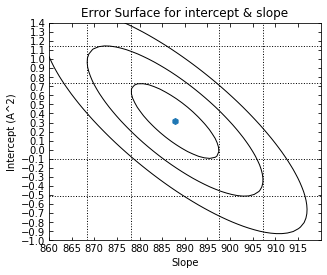

In [15]:
# Define a linear model
def model(m, c):
    return m*x + c

# Define the chi-squared function for m and c, given the data
def chi2fun(m, c):
    normres = (y - model(m,c))/alpha_y
    return np.sum(normres**2)

# Compute chi-squared over a 2D grid of equally-spaced values of m and c
Nm = 50
Nc = 50
m = np.linspace(860, 920, num=Nm)
c = np.linspace(-1, 1.4, num=Nc)

chi2grid = np.zeros([Nc, Nm])
for i in range(Nc):
    for j in range(Nm):
        chi2grid[i, j] = chi2fun(m[j], c[i])

mHat = p0_opt
cHat = p1_opt
mAlpha = np.sqrt(pCov[0, 0])
cAlpha = np.sqrt(pCov[1, 1])

# Display formatted results
print(f"Model slope (1-sigma error):     {mHat:.2f} ± {mAlpha:.2f}")
print(f"Model intercept (1-simga error):    {cHat:.3f} ± {cAlpha:.3f}")
print()
print(f"Model slope (2-sigma error):     {mHat:.2f} ± {2*mAlpha:.2f}")
print(f"Model intercept (2-simga error):    {cHat:.3f} ± {2*cAlpha:.3f}")
print()
print(f"Model slope (3-sigma error):     {mHat:.2f} ± {3*mAlpha:.2f}")
print(f"Model intercept (3-simga error):    {cHat:.3f} ± {3*cAlpha:.3f}")
print()

# Evaluate the chi-squared function at the minimum and define contour levels
#    level_low: standard 1D confidence levels (see caption of MU Fig. 6.9)
#    level_high: additional contours to show behavior far from minimum
chi2min = chi2fun(mHat, cHat)
level_low = chi2min + [1, 4, 9]
#level_high = chi2min + np.arange(11, 121, 10)

# Show minimum and contours around minimum
plt.plot(mHat, cHat, 'h')
plt.contour(m, c, chi2grid, level_low, colors=['k','k','k'], linewidths=1, 
            linestyles=['solid', 'solid', 'solid'])
#plt.contour(m, c, chi2grid, level_high, linewidths=0.5)

# Show 1-sigma and 2-sigma uncertainty bounds as dashed lines
plt.hlines(cHat + cAlpha*np.array([-2, -1, 1, 2]), m[0], m[-1], 
           linewidths=1, linestyles='dotted')
plt.vlines(mHat + mAlpha*np.array([-2, -1, 1, 2]), c[0], c[-1], 
           linewidths=1, linestyles='dotted')

# Format plot to resemble MU Fig. 6.9
plt.title("Error Surface for intercept & slope")
plt.xticks(np.arange(860, 920, 5))
plt.yticks(np.arange(-1, 1.5, 0.1))
plt.xlabel("Slope")
plt.ylabel("Intercept (A^2)")
plt.tick_params(direction='in', top=True, right=True)
xmin, xmax, ymin, ymax = plt.axis()
plt.gca().set_aspect(0.8*(xmax - xmin)/(ymax - ymin))

plt.show()